In [67]:
from io import StringIO
import pandas as pd

import itertools
from scipy.stats import ttest_ind

import seaborn as sns

s = """	p2	p5	p3	p22	p12	p15	p8	p14	p21	p23	p26	p25	p24	p19	p36	p20	p35	p34	p16	p31	p30	p29	p33	p32
g858.t1	3.960363269	4.833409401	2.196306386	6.150264723	5.764851492	8.412997373	9.909459477	2.159531011	7.033075474	4.242741821	11.9443227	0	17.36137354	1.572526043	5.445192495	5.151034036	7.746041194	5.197994171	2.88509348	2.911075002	5.229280369	18.15051314	0.3154787035	0.2804166817
g8697.t1	10.57415923	24.67048948	22.04212539	15.94912484	0.4251899294	11.87519048	5.759046915	17.37757807	13.55138953	53.50214053	47.06035405	0	44.62329659	10.01316106	11.26859975	20.62987044	6.613540901	7.880610317	5.785678036	19.24939863	19.47676683	82.14177938	2.008831004	23.46750874
population	Other	Other	Other	Other	Other	Other	lymphoid	Other	cytotoxic	high HLA-F	high HLA-F	Other	high HLA-F	lymphoid	Other	cytotoxic	Other	Other	Other	cytotoxic	cytotoxic	Other	Other	Other"""

blood_populations = pd.read_csv(StringIO(s), sep="\t",index_col=0).T

blood_populations.head()

,g858.t1,g8697.t1,population
p2,3.960363269,10.57415923,Other
p5,4.833409401,24.67048948,Other
p3,2.196306386,22.04212539,Other
p22,6.150264723,15.94912484,Other
p12,5.764851492,0.4251899294,Other


In [68]:
gene_ids = 'g8697.t1', 'g858.t1'

In [69]:
blood_populations['g858.t1'] = blood_populations['g858.t1'].astype(float)
blood_populations['g8697.t1'] = blood_populations['g8697.t1'].astype(float)


--- g8697.t1 ---
Other
- Ttest_indResult(statistic=-1.2606895685672759, pvalue=0.22292058111523283)
lymphoid
- Ttest_indResult(statistic=-2.751187891927056, pvalue=0.015543181118027199)
cytotoxic
- Ttest_indResult(statistic=-0.38481662315615395, pvalue=0.7041078894361675)
high HLA-F
- Ttest_indResult(statistic=7.172060965044004, pvalue=8.517840602884553e-06)

--- g858.t1 ---
Other
- Ttest_indResult(statistic=-1.161577514497045, pvalue=0.26287659761173415)
lymphoid
- Ttest_indResult(statistic=-0.011327669375323177, pvalue=0.9926314210389033)
cytotoxic
- Ttest_indResult(statistic=-0.5915765731845544, pvalue=0.562448523787269)
high HLA-F
- Ttest_indResult(statistic=1.578459617842166, pvalue=0.24289497357165724)


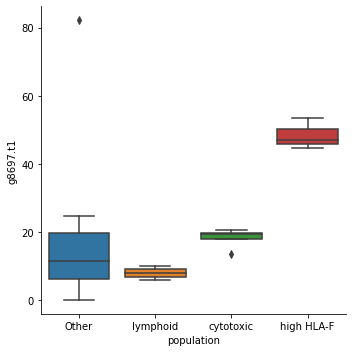

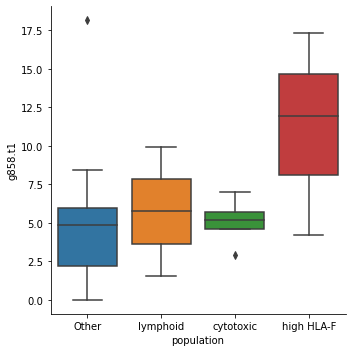

In [73]:
for g in gene_ids:
    print(f'\n--- {g} ---')
    sns.catplot(data=blood_populations, x="population", y=g, kind="box")

    
    for population in blood_populations.population.unique():
        print(population)
        print("-",
            ttest_ind(
                blood_populations.query('population == @population')[g],
                blood_populations.query('population != @population')[g],
                equal_var=False,
            )
        )

# 400 sample dataset

In [40]:
s = '''	2061_L11HMBY15xSC6ab_24_2_zooids	2335_5139jL11HMBYSc6ab_15_9_vs_944axBYd196_6_4_101	2336_5139jL11HMBYSc6ab_15_9_vs_944axBYd196_6_4_101	2341_5139jL11HMBYSc6ab_15_9_vs_944axBYd196_6_4_101	2347_5139jL11HMBYSc6ab_15_9_vs_944axBYd196_6_4_101	2371_5432b1_test_naive_StageAtoB	2372_5432b1_zooid_naive_stageAtoB	2374_5423b1_test_naive_stageC1	2375_5423b1_zooidsremains_naive_stageC1	2389_chimera_L11HM9abld196_4_15_93_vs_944axbyd196_6_4_test	2390_chimera_L11HM9abld196_4_15_93_vs_944axbyd196_6_4_zooid_without_test	2392_chimera_L11HM9abld196_4_15_93_vs_944axbyd196_6_4_test	2393_chimera_L11HM9abld196_4_15_93_vs_944axbyd196_6_4_zooid_without_test	2487_chimera_944axbyd196_vs_sc6ab_zooid_stageBtoC	2489_chimera_944axbyd196_vs_sc6ab_test_stageBtoC	2490_chimera_944axbyd196_vs_sc6ab_zooid_stageBtoC	2491_chimera_944axbyd196_vs_sc6ab_zooid_stageBtoC	2587_HM9axBYd196_6_4_202_vs_944axBYd196_6_4_103	2596_HM9axBYd196_6_4_202_vs_944axBYd196_6_4_103	2619_chimera_5432b_vs_5423b_zooid_StageA2	2620_chimera_5432b_vs_5423b_test_stageA2	2625_chimera_5432b_vs_5423b_test_StageA2	2626_chimera_5432b_vs_5423b_zooid_StageA2	2627_chimera_5432b_vs_5423b_zooid_StageA2	2662_HM9axBYd196_6_4_202_vs_944axBYd196_6_4_103	3018_5139jL11HMBYSc6ab35_15_8_rem_of_zooids_StageA1to2	3376_Sc109e_6_vs_5491b3	3378_Sc109e_6_vs_5491b3	3385_Sc109e_6_vs_5491b3	3389_Sc109e_6_vs_5491b3	3395_Sc109e.7_testes_stage-C	3396_Sc109e.7_zooid_stage-C	3561_5606b_vs_L11HMBY15xSC6ab_24_6	3562_5606b_vs_L11HMBY15xSC6ab_24_6	3852_Sc109e_Primary_secondary_bud_A1_kp	3852_Sc109e_stageA1_primary_andSecBud	3864_Sc109e_Primary_secondary_bud_A2_kp	3868_Sc109e_zooid_buds_intestine_A2_kp	3872_Sc109e_endostyle_and_CI_stageA2_kp	3886_Sc109e_Primary_Secondary_bud_D_mid_late_kp	3887_Sc109e_Sec_Bud_D_mid_late_kp	3890_Sc109e_old_zooid_D_mid_Late_kp	3900_Sc109e_Sec_bud_D_early_mid_kp	3901_Sc109e_Primary_bud_D_early_mid_kp	3902_Sc109e_olds_zooid_D_early_mid_kp	3912_Sc109e_primary_and_sec-bud_D_early_mid_kp	3917_Sc109e_ampullae_tunic_D_early_mid_kp	3933_944axByd196.6_Blood_microinjector_sample_early_D_DCRS	3948_944axByd196.6_x_sc109e.92	3949_944axByd196.6_x_sc109e.92	3950_944axByd196.6_x_sc109e.92	3952_944axByd196.6_x_sc109e.92	3953_944axByd196.6_x_sc109e.92	3954_944axByd196.6_x_sc109e.92	3956_944axByd196.6_x_sc109e.92	3959_944axByd196.6_x_sc109e.92	3960_944axByd196.6_x_sc109e.92	3961_944axByd196.6_x_sc109e.92	3963_944axByd196.6_x_sc109e.92	3964_944axByd196.6_x_sc109e.92	3965_944axByd196.6_x_sc109e.92	3967_944axByd196.6_x_sc109e.92	3968_944axByd196.6_x_sc109e.92	3971_944axByd196.6_x_sc109e.92	3972_944axByd196.6_x_sc109e.92	3973_944axByd196.6_x_sc109e.92	4017_944axbyd196_stageC1to2_SecBud	4033_5869setelmentslide_stageC2_4secondarybuds	4036_5869settelmentslide_2endostyles_StageC2	4041_5869settelmentslide_Primaryandsecbud_stageB1	4078_944aBYd196_6_4_194	4079_944aBYd196.6_4.194_vs_5974a	4080_944aBYd196_6_4_194_vs_5974a	4081_5973a_vs_5976b	4082_5968r_2a_vs_5974a	4083_5968_2a_vs_5974a	4085_5875a_vs_5876a	A1L34-Sample_5139jLllHMBYSc6a-b35-15_ampullae_IL2382-12	A1L34-Sample_5139jLllHMBYSc6a-b35-15_endostyle_IL2383-14	A1L34-Sample_LllHMBY15xSc6a-b-24_endostyle_IL2384-16	A1L34-Sample_sc109e_bud_stage_a_IL2381-10	A1L34-Sample_sc6a-b_system_IL2379-5	A1M1B-Sample_5139jLllHMBYSc6a-b35-15_endostyle_IL2383-14	A1M1B-Sample_LllHMBY15xSc6a-b-24_endostyle_IL2384-16	A1M1B-Sample_sc109e_bud_stage_a_IL2381-10	BloodCells_BP12_BLD12_CellPopulation12_CD57positive_Pool_5colonies_Age4_9_13Years_Stages_AtoD_FACS_sorted_072414_BR__N383Barcode_P88_H4_S85_R1_001	BloodCells_BP16_BLD16_CellPopulation16_4_BHFpositiveCD57negative_Pool_5colonies_4_9_13Yearold_Stages_AtoD_Sorted_072414_BR__N383Barcode_P89_H5_S86_R1_001	BloodCells_BP19_BLD19_CellPopulation19_4_BHFnegative_Pool_Age6MonthOld_GeneralStock_FACS_sorted_010615_BR__N383Barcode_P73_G1_S71_R1_001	BloodCells_BP31_BLD31_CellPopulation31_BHFnegative_Pool_5colonies_4_9_13Yearold_Stages_AtoD_FACS_sorted_072414_BR__N383Barcode_P74_G2_S72_R1_001	BloodCells_BP32_BLD32_CellPopulation32_NotBHFnegativeAPpositive_Pool_5colonies_4_9_13Yearold_Stages_AtoD_sorted_072414_BR__N383Barcode_P75_G3_S73_R1_001	BloodCells_BP33_BLD33_CellPopulation33_BHFpositiveCD57positive_Pool_5colonies_Age4_9_13Years_Stages_AtoD_FACS_sorted_072414_BR__N383Barcode_P76_G4_S74_R1_001	BloodCells_BP34_BLD34_CellPopulation34_BHFnegativeCD57negative_Pool_5colonies_4_9_13Yearold_Stages_AtoD_sorted_072414_BR__N383Barcode_P77_G5_S75_R1_001	BloodCells_BP3_BLD3_CellPopulation3_SmallCells_Pool_5colonies_Age4_9_13Years_Stages_AtoD_FACS_sorted_072414_BR__N383Barcode_P70_F10_S68_R1_001	BloodCells_BP5_BLD5_CellPopulation5__BHFnegativeAPpositive_Pool_5colonies_Age4_9_13Years_Stages_AtoD_FACS_sorted_072414_BR__N383Barcode_P71_F11_S69_R1_001	BloodCells_BP8_BLD8_CellPopulation8_Pigment_Pool_5colonies_Age4_9_13Years_Stages_AtoD__FACS_sorted_072414_BR__N383Barcode_P72_F12_S70_R1_001	CellPopulation12_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation14_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation15_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation16_2_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation19_4_mix6month_oldcolonies_generalstock_Sorted010615	CellPopulation20_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation21_4_mix6month_oldcolonies_generalstock_Sorted010615	CellPopulation22_4_mix6month_oldcolonies_generalstock_Sorted010615	CellPopulation23_2_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation24_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation25_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation26_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation29_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation2_Livecell_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation30_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation31_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation32_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation33_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation34_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation35_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation36_2_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation3_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation5_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	CellPopulation8_mix5oldcolonies_13_9_4yearold_Stages_AtoD_Sorted072414	Clock_CL100_6218b_FreeRun_age43days_9AM_naive_system__N383Barcode_P14_B2_S13_R1_001	Clock_CL102_6172k_FreeRun_age36days_9AM_naive_system__N383Barcode_P15_B3_S14_R1_001	Clock_CL104_5139jL11HMBYSc6a_b35_15_FreeRun_stage_A_age2142days_3PM_chimera_system__N383Barcode_P16_B4_S15_R1_001	Clock_CL106_5139jL11HMBYSc6a_b35_15_FreeRun_stage_A_age2142days_3PM_chimera_system__N383Barcode_P17_B5_S16_R1_001	Clock_CL108_5139jL11HMBYSc6a_b35_15_FreeRun_stage_A_age2142days_6PM_chimera_system__N383Barcode_P18_B6_S17_R1_001	Clock_CL110_5139jL11HMBYSc6a_b35_15_FreeRun_stage_A_age2142days_6PM_chimera_system__N383Barcode_P19_B7_S18_R1_001	Clock_CL113_5139jL11HMBYSc6a_b35_15_FreeRun_stage_A_age2142days_9PM_chimera_system__N383Barcode_P20_B8_S19_R1_001	Clock_CL114_5139jL11HMBYSc6a_b35_15_FreeRun_stage_A_age2143days_Midnight_chimera_system__N383Barcode_P21_B9_S20_R1_001	Clock_CL116_L11HMBY15xSc6a_b_40_FreeRun_stage_A_age2146days_Midnight_naive_system__N383Barcode_P22_B10_S21_R1_001	Clock_CL118_5139jL11HMBYSc6a_b35_15_FreeRun_stage_A_age2143days_3AM_chimera_system__N383Barcode_P23_B11_S22_R1_001	Clock_CL119_L11HMBY15xSc6a_b_40_FreeRun_age2146days_3AM_naive_system__N383Barcode_P24_B12_S23_R1_001	Clock_CL121_L11HMBY15xSc6a_b_40_FreeRun_age2146days_6AM_naive_system__N383Barcode_P25_C1_S24_R1_001	Clock_CL122_5139jL11HMBYSc6a_b35_15_FreeRun_stage_A_age2143days_6AM_chimera_system__N383Barcode_P26_C2_S25_R1_001	Clock_CL124_5139jL11HMBYSc6a_b35_15_FreeRun_age2143days_9AM_chimera_system__N383Barcode_P27_C3_S26_R1_001	Clock_CL128_5139jL11HMBYSc6a_b35_15_FreeRun_age2143days_Noon_chimera_system__N383Barcode_P29_C5_S28_R1_001	Clock_CL130_L11HMBY15xSc6a_b_40_FreeRun_stage_A_age2146days_Noon_naive_system__N383Barcode_P30_C6_S29_R1_001	Clock_CL132_L11HMBY15xSc6a_b_40_FreeRun_stage_A_age2146days_3PM_naive_system__N383Barcode_P31_C7_S30_R1_001	Clock_CL133_L11HMBY15xSc6a_b_40_FreeRun_stage_A_age2146days_3PM_naive_system__N383Barcode_P32_C8_S31_R1_001	Clock_CL134_L11HMBY15xSc6a_b_40_FreeRun_stage_A_age2146days_6PM_naive_system__N383Barcode_P33_C9_S32_R1_001	Clock_CL135_L11HMBY15xSc6a_b_40_FreeRun_stage_A_age2146days_6PM_naive_system__N383Barcode_P34_C10_S33_R1_001	Clock_CL140_Duplicate_6515d_FreeRun_24hours_DD_StageA_age118days_3PM_naive_HalfSystem_110817Experiment_111217_sampled	Clock_CL141_6515d_FreeRun_24hours_DD_StageA_age118days_3PM_naive_HalfSystem_110817Experiment_111217_sampled	Clock_CL142_944axBYd196_6_4_266_5_FreeRun_24hours_DD_StageA_age5869days_3PM_naive_WholeSystem_110817Experiment_111217_sampled	Clock_CL143_944axBYd196_6_4_266_5_FreeRun_24hours_DD_StageA_age5869days_3PM_naive_WholeSystem_110817Experiment_111217_sampled	Clock_CL144_6515g_FreeRun_24hours_DD_StageDtoA_age118days_6PM_naive_HalfSystem_110817Experiment_111217_sampled	Clock_CL145_6515g_FreeRun_24hours_DD_StageA_age118days_6PM_naive_HalfSystem_110817Experiment_111217_sampled	Clock_CL147_944axBYd196_6_4_266_6_FreeRun_24hours_DD_StageA_age5869days_6PM_naive_HalfSystem_110817Experiment_111217_sampled	Clock_CL148_944axBYd196_6_4_266_1_FreeRun_24hours_DD_StageA_age5869days_9PM_naive_HalfSystem_110817Experiment_111217_sampled	Clock_CL150_6530b_FreeRun_24hours_DD_StageA_age108days_9PM_naive_HalfSystem_110817Experiment_111217_sampled	Clock_CL151_6530b_FreeRun_24hours_DD_StageA_age108days_9PM_naive_HalfSystem_110817Experiment_111217_sampled	Clock_CL152_944axBYd196_6_4_266_4_Duplicate_FreeRun_24hours_DD_StageA_age5870days_Midnight_naive_WholeSystem_110817Experiment_111317_sampled	Clock_CL152_944axBYd196_6_4_266_4_FreeRun_24hours_DD_StageA_age5870days_Midnight_naive_WholeSystem_110817Experiment_111317_sampled	Clock_CL153_944axBYd196_6_4_266_4_FreeRun_24hours_DD_StageA_age5870days_Midnight_naive_WholeSystem_110817Experiment_111317_sampled	Clock_CL154_6530d_FreeRun_24hours_DD_StageA_age109days_Midnight_naive_WholeSystem_110817Experiment_111317_sampled	Clock_CL154_6530d_FreeRun_24hours_DD_StageA_age81days_Midnight_naive_110817Experiment_111317sampled	Clock_CL155_6530d_FreeRun_24hours_DD_StageA_age81days_Midnight_naive_110817Experiment_111317sampled	Clock_CL156_944axBYd196_6_4_266_2_FreeRun_24hours_DD_StageA_age5870days_3AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL157_944axBYd196_6_4_266_2_FreeRun_24hours_DD_StageA_age5870days_3AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL158_6542SingleProgeny_FreeRun_24hours_DD_StageA_age103days_3AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL159_6542SingleProgeny_FreeRun_24hours_DD_StageA_age103days_3AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL161_944axBYd196_6_4_266_3_FreeRun_24hours_DD_StageA_AB_age5870days_6AM_naive_WholeSystem_110817Experiment_111317_sampled	Clock_CL162_6515b_FreeRun_24hours_DD_StageEarlyA_age115days_6AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL163_6515b_FreeRun_24hours_DD_StageEarlyA_age115days_6AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL164_944axBYd196_6_4_266_6_FreeRun_24hours_DD_StageA_age5870days_9AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL165_944axBYd196_6_4_266_6_FreeRun_24hours_DD_StageA_age5870days_9AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL166_6515e_FreeRun_24hours_DD_StageDtoA_age119days_9AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL167_6515e_FreeRun_24hours_DD_StageDtoA_age119days_9AM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL168_944axBYd196_6_4_266_1_FreeRun_24hours_DD_StageA_age5870days_Noon_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL169_944axBYd196_6_4_266_1_FreeRun_24hours_DD_StageA_age5870days_Noon_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL170_Duplicate_944axBYd196_6_4_266_4_FreeRun_24hours_DD_StageA_age5870days_3PM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL171_944axBYd196_6_4_266_4_Duplicate_FreeRun_24hours_DD_StageA_age5870days_3PM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL173_944axBYd196_6_4_266_6_FreeRun_24hours_DD_StageA_age5870days_6PM_naive_Half_WholeSystem_110817Experiment_111317_sampled	Clock_CL174_944axBYd196_6_4_266_1_FreeRun_24hours_DD_StageA_age5870days_9PM_naive_110817Experiment_111317_sampled	Clock_CL176_6515g_FreeRun_24hours_DD_StageA_age119days_9PM_naive_HalfSystem_110817Experiment_111317_sampled	Clock_CL178_944axBYd196_6_4_266_4_FreeRun_24hours_DD_StageA_age5871days_Midnight_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL179_944axBYd196_6_4_266_4_FreeRun_24hours_DD_StageA_age5871days_Midnight_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL182_944axBYd196_6_4_269_11_FreeRun_24hours_DD_AfterLightPulse_StageA_age5871days_Midnight30MinutePulse_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL183_944axBYd196_6_4_269_11_FreeRun_24hours_DD_AfterLightPulse_StageA_age5871days_Midnight30MinutePulse_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL184_944axBYd196_6_4_252_13_Duplicate_FreeRun_24hours_DD_StageA_age5871days_3AM_naive_110817Experiment_111417_sampled	Clock_CL184_944axBYd196_6_4_252_13_Duplicate_FreeRun_24hours_DD_StageA_age5871days_3AM_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL187_944axBYd196_6_4_252_14_FreeRun_24hours_DD_StageA_age5871days_6AM_naive_WholeSystem_110817Experiment_111417_sampled	Clock_CL188_6515b_FreeRun_24hours_DD_StageA_age116days_6AM_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL189_6515b_FreeRun_24hours_DD_StageA_age116days_6AM_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL190_944axBYd196_6_4_252_16_FreeRun_24hours_DD_StageA_age5871days_9AM_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL191_944axBYd196_6_4_252_16_FreeRun_24hours_DD_StageA_age5871days_9AM_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL192_944axBYd196_6_4_252_15_FreeRun_24hours_DD_stageA_age5871days_Noon_naive_WholeSystem_110817Experiment_111417_sampled	Clock_CL193_944axBYd196_6_4_252_15_FreeRun_24hours_DD_stageA_age5871days_Noon_naive_WholeSystem_110817Experiment_111417_sampled	Clock_CL194_6530c_FreeRun_24hours_DD_StageAtoB_age110days_Noon_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL195_6530c_FreeRun_24hours_DD_stageAtoB_age110days_Noon_naive_5zooids__110817Experiment_111417_sampled	Clock_CL196_944axBYd196_6_4_252_13_FreeRun_24hours_DD_stageA_age5871days_3pm_naive_HalfSystem_110817Experiment_111417_sampled	Clock_CL197_944axByd196_6_4_252_13_FreeRun_24hours_DD_StageA_age_5871days_3pm_naive_HalfSystem_110817Experimant_111417sampled	Clock_CL198_6491a_FreeRun_24hours_DD_StageLateD_age142days_3PM_naive_110817Experimant_111417sampled	Clock_CL50_6171d_FreeRun_stage_A_age52days_9PM_naive_system__N383Barcode_P1_A1_S1_R1_001	Clock_CL52_6171i_FreeRun_stage_A_age52days_9PM_naive_system__N383Barcode_P2_A2_S2_R1_001	Clock_CL71_6215b_FreeRun_stage_A_age67days_Noon_naive_system__N383Barcode_P3_A3_S3_R1_001	Clock_CL73_6217j_FreeRun_stage_A_age67days_Noon_naive_system__N383Barcode_P4_A4_S4_R1_001	Clock_CL76_6215d_FreeRun_stage_A_age68days_3PM_naive_system__N383Barcode_P5_A5_S5_R1_001	Clock_CL78_6215f_FreeRun_stage_A_age68days_3PM_naive_system__N383Barcode_P6_A6_S6_R1_001	Clock_CL90_6218d_FreeRun_stage_A_age42days_6PM_naive_system__N383Barcode_P7_A7_S7_R1_001	Clock_CL91_6218d_FreeRun_stage_A_age42days_6PM_naive_system__N383Barcode_P8_A8_S8_R1_001	Clock_CL93_6172a_FreeRun_stage_A_age36days_Midnight_naive_system__N383Barcode_P9_A9_S9_R1_001	Clock_CL94_6172b_FreeRun_stage_A_age36days_Midnight_naive_system__N383Barcode_P10_A10_S10_R1_001	Clock_CL97_6172g_FreeRun_stage_A_age36days_3AM_naive_system__N383Barcode_P12_A12_S11_R1_001	Clock_CL98_6172h_FreeRun_stage_A_age36days_6AM_naive_system__N383Barcode_P13_B1_S12_R1_001	Clock_Cl126_L11HMBY15xSc6a_b_40_FreeRun_2146days_9AM_stgD_A1__N383Barcode_P28_C4_S27_R1_001	FACS_sorted_cell_population_sony_facs_from_testes	HISeq-Sample_-5139jLllHMBYSc6a-b35--15_ampullae_IL2382-12	HISeq-Sample_-5139jLllHMBYSc6a-b35--15_endostyle_IL2383-14	HISeq-Sample_216-Sc32e	HISeq-Sample_248-2362c	HISeq-Sample_3411_IL2574-4	HISeq-Sample_3417_IL2575-5	HISeq-Sample_3424_IL2576-6	HISeq-Sample_3434_IL2577-7	HISeq-Sample_3435_IL2578-12	HISeq-Sample_745u-n_Ax	HISeq-Sample_944axbyd196-1	HISeq-Sample_944axbyd196-10	HISeq-Sample_944axbyd196-12	HISeq-Sample_944axbyd196-21C	HISeq-Sample_944axbyd196-21E	HISeq-Sample_944axbyd196-22C	HISeq-Sample_944axbyd196-22E	HISeq-Sample_944axbyd196-3	HISeq-Sample_944axbyd196-4	HISeq-Sample_944axbyd196-6	HISeq-Sample_944axbyd196-7	HISeq-Sample_944axbyd196-8	HISeq-Sample_944axbyd196-9	HISeq-Sample_99-Hm9ayw1225c	HISeq-Sample_AA-yw1023-96	HISeq-Sample_AA-yw1258-21	HISeq-Sample_AA-yw_By_3-29	HISeq-Sample_ByByd129_A	HISeq-Sample_ByByw557_BB	HISeq-Sample_Yw764_AA	HISeq-Sample_bb	HISeq-Sample_bot_cDNA_15	HISeq-Sample_bot_cDNA_31	HISeq-Sample_bot_cDNA_4	HISeq-Sample_bot_cDNA_P	HISeq-Sample_bot_cDNA_X	HISeq-Sample_bot_cDNA_Y	HISeq-Sample_sc109e_bud_stage_a_IL2381-10	Hm9axByd196.6_4_219	IL5692_Clock16_16h_cycle_5873e_stage_a2_sample_2h_into_dark	IL5693_Clock15_16h_cycle_5880a_stage_a2__sample_2h_into_dark	IL5694_Bld10_FACS_sorted_BR	IL5695_Bld7_Facs_sorted_BR	IL5696_Clock28_16h_cycle_5872d_stage_a1_sample_7h_into_light	IL5697_Clock27_16h_cycle_5872g_stage_a_sample_7h_into_light	IL5698_Clock24_16h_cycle_5879J_stage_a1_sample_3h_into_light	IL5699_Clock23_16h_cycle_5873r_stage_a1_sample_3h_into_light	IL5700_LateWrp_sampled081914	IL5701_midwrp_sampled081914	IL5702_Early_wrp_sampled082114	IL5703_Tailbd_sampled091014	IL5704_Gastrula_sampled081914	IL5705_Blastula_sampled081914	IL5706_Clock31_24h_cycle_5873k_stage_a1_sampleat_6pm_light	IL5707_Clock19_16h_cycle_5873s_stage_a1_sample6h_into_dark	IL5708_Clock20_16h_cycle_5873i_stage_a1_sample_6h_into_dark	IL5709_Clock32_24h_cycle_5873n_stage_a1_sample_6pm_light	IL5710_Clock44_24h_cycle_5880f_stage_a2_sample_6am_dark	IL5711_Clock42_24h_cycle_5879a_stage_a2_sample_6am_dark	IL5712_Clock40_24h_cycle_5872e__stage_a2_sample_12pm_light	IL5713_Clock39_24h_cycle_5875b__stage_a2_sample_12pm_light	IL5714_Clock36_24h_cycle_5873c__stage_a1_sample_12am_dark	IL5715_Clock35__24h_cycle_5873g__stage_a1_sample_12am_dark	SampleE55_2cellembryos_9each_fromMontereyMarina_collected82616__N383Barcode_P63_F3_S61_R1_001	Sample_2814_944xsc109eCCA_944nontouchinghalf_IL4603-1	Sample_2815_944xsc109eCCA_944touchinghalf_IL4604-2	Sample_2816_sc109ex944CCA_sc109etouchinghalf_IL4605-3	Sample_2817_sc109ex944CCA_sc109enontouchinghalf_IL4606-4	Sample_2818_944axByd196_6_4_145_naive_IL4607-5	Sample_2820_944x5139jCCA_944nontouchibghalf_IL4608-6	Sample_2821_944x5139jCCA_944touchinghalf_IL4609-7	Sample_2822_5139jx944CCA_5139jtouchinghalf_IL4610-8	Sample_2823_5139jx944CCA_5139jnontouchinghalf_IL4611-9	Sample_2824_5139jxsc109eCCA_5139jnontouchinghalf_IL4612-10	Sample_2825_5139jxsc109eCCA_5139jtouchinghalf_IL4613-11	Sample_2826_sc109ex5139jCCA_sc109etouchinghalf_IL4614-12	Sample_2827_sc109ex5139jCCA_sc109enontouchinghalf_IL4615-1	Sample_2828_5139jL11HMBySc6ab35_15_3_naive_IL4616-2	Sample_2829_sc109enaive_IL4617-3	Sample_4111_2_6089_e_primary_bud_1PrimaryBud_stageA2_naive_young_2weeks	Sample_4111_4_6089_e_primary_bud_1PrimaryBud_stageA2_naive_young_2weeks	Sample_4117_endostyle_6endostyles_stageA_A1A2_young_40days_Pool	Sample_4121_endostyle_6endostyles_stageA_A1A2_young_41days_Pool	Sample_4129_944axBYd196_6_4_227_primary_secondary_bud_7primaryAndsecondaryBud_stageB_old_14years_naive	Sample_4137_944axBYd196_6_4_231_endostyle_6endostyles_stageC_C1C2_old_14years_naive	Sample_4140_2_944axBYd196_6_4_231_endostyle_5endostyles_stageC_C1C2_old_14years_naive	Sample_4144_944axBYd196_6_4_231_secondary_bud_5secondaryBud_stageD_midLate_old_14years_naive	Sample_4145_944axBYd196_6_4_231_primary_bud_5primaryBud_stageD_midLate_old_14years_naive	Sample_4171_6208b_2_primary_secondary_bud_stageB_B1B2_approx5months_naive	Sample_4178_6176_a_primary_secondary_bud_stage_B1_approx6months_naive	Sample_4184_6208t_primary_bud_stageC2_possibleTestesInBuds_approx6months_naive	Sample_4190_6150b_primary_bud_primaryBud_stageD_early_gonads_naive_approx6months	Sample_4193_6106b_primary_bud_2primaryBud_stageC_C1C2_gonads_naive_approx6months	Sample_4218_6331_2_1_Settlement_Slide_nervous_tissue_8_nervous_tissue_stage_A1_naive_110816_sampled__N383Barcode_P35_C11_S34_R1_001	Sample_4234_6328_2_Settlement_Slide_testes_whole_4_testes_stage_B1_naive_111616_sampled__N383Barcode_P36_C12_S35_R1_001	Sample_4341_6296a_nervous_tissue_8_nervous_tissue_stage_A1_A2	Sample_4346_6296a_testes_whole__4_testes_whole_stage_A1_A2_naive_112216_sampled__N383Barcode_P38_D2_S37_R1_001	Sample_4346_6296a_testes_whole__4_testes_whole_stage_A1_A2_naive_112216_sampled__N383Barcode_P79_G7_S77_R1_001	Sample_4355_6348_Settlement_Slide_secondary_bud_4_secondary_bud_stage_C1_C2_naive_121016_sampled__N383Barcode_P39_D3_S38_R1_001	Sample_4355_6348_Settlement_Slide_secondary_bud_4_secondary_bud_stage_C1_C2_naive_121016_sampled__N383Barcode_P80_G8_S78_R1_001	Sample_6127_L11HMBY15xSc6a_b_31_6_endostyle_2Endostyle_stageB1_old_6years_naive_120115_sampled__N383Barcode_P40_D4_S39_R1_001	Sample_6131_L11HMBY15xSc6a_b_31_6_endostyle_1andHalfEndostyle_stageB1_old_6years_naive_120115_sampled__N383Barcode_P41_D5_S40_R1_001	Sample_6138_6144Settlement_1colony_endostyle_OneAndHalfEndostyles_stageA_A1A2_approx2months_Naive_120315_sampled__N383Barcode_P42_D6_S41_R1_001	Sample_6138_assortedYoung_3colonies_endostyle_8endostyles_stageA_A1A2_approx2months_Pool	Sample_E12_MontereyWildColony_2_cell_embryos_6_2_cell_pool_060315_sampled__N383Barcode_P43_D7_S42_R1_001	Sample_E12_MontereyWildColony_2_cell_embryos_6_2_cell_pool_060315_sampled__N383Barcode_P81_G9_S79_R1_001	Sample_E15_MontereyWildColony_blastula_embryos_22_blastula_pool_06301_sampled__N383Barcode_P44_D8_S43_R1_001	Sample_E15_MontereyWildColony_blastula_embryos_22_blastula_pool_06301_sampled__N383Barcode_P85_H1_S82_R1_001	Sample_E21_MontereyWildColony_wrap_early_very_embryos_110_wrap_early_very_pool_083015_sampled__N383Barcode_P45_D9_S44_R1_001	Sample_E21_MontereyWildColony_wrap_early_very_embryos_110_wrap_early_very_pool_083015_sampled__N383Barcode_P82_G10_S80_R1_001	Sample_E21_MontereyWildColony_wrap_early_very_embryos_110_wrap_early_very_pool_083015_sampled__N383Barcode_P86_H2_S83_R1_001	Sample_E27_MontereyWildColony_4_cell_embryos_8_4cell_pool_UnknownSampleDate__N383Barcode_P46_D10_S45_R1_001	Sample_E27_MontereyWildColony_4_cell_embryos_8_4cell_pool_UnknownSampleDate__N383Barcode_P87_H3_S84_R1_001	Sample_E30_MontereyWildColony_wrap_late_embryos_30_wrap_late_pool_080316_sampled__N383Barcode_P47_D11_S46_R1_001	Sample_E31_MontereyWildColony_wrap_mid_embryos_25_wrap_mid_pool_080316_sampled__N383Barcode_P48_D12_S47_R1_001	Sample_E33_MontereyWildColony_pear_embryos_11_pear_pool_080316_sampled__N383Barcode_P49_E1_S48_R1_001	Sample_E35_MontereyWildColony_gastrula_embryos_21_gastrula_pool_080416_sampled__N383Barcode_P51_E3_S49_R1_001	Sample_E35_MontereyWildColony_gastrula_embryos_21_gastrula_pool_080416_sampled__N383Barcode_P83_G11_S81_R1_001	Sample_E36_MontereyWildColony_gastrula_embryos_24_gastrula_pool_080416_sampled__N383Barcode_P52_E4_S50_R1_001	Sample_E37_MontereyWildColony_tailbud_embryos_35_tailbud_pool_080416_sampled__N383Barcode_P53_E5_S51_R1_001	Sample_E39_wrap_late_embryos_NumberUnknown_wrap_late_pool_LightPink_eyespot_pool_080416_sampled__N383Barcode_P54_E6_S52_R1_001	Sample_E40_MontereyWildColony_wrap_early_mid_embryos_UnknownNumber_wrap_early_mid_pool_080416_sampled__N383Barcode_P55_E7_S53_R1_001	Sample_E41_MontereyWildColony_blastula_embryos_25_blastula_pool_080416_sampled__N383Barcode_P56_E8_S54_R1_001	Sample_E44_MontereyWildColony_wrap_early_embryos_20_wrap_early_pool_082316_sampled__N383Barcode_P57_E9_S55_R1_001	Sample_E45_MontereyWildColony_morula_pre_embryos_25_morula_pre_pool_082316_sampled__N383Barcode_P58_E10_S56_R1_001	Sample_E46_MontereyWildColony_tadpole_half_tail_embryos_2_tadpole_half_tail_082316_sampled__N383Barcode_P59_E11_S57_R1_001	Sample_E49_MontereyWildColony_tadpole_touchdown_embryos_3_tadpole_touchdown_pool_082316_sampled__N383Barcode_P60_E12_S58_R1_001	Sample_E50_MontereyWildColony_tadpole_motile_embryos_7_tadpole_pool_082316_sampled__N383Barcode_P69_F9_S67_R1_001	Sample_E52_MontereyWildColony_oozooid__tiny_tail_remnant_embryos_unknown_number_oozooid_tail_remnant_pool_082316_sampled__N383Barcode_P62_F2_S60_R1_001	Sample_E56_MontereyWildColony_4_cell_embryos_22_4_cell_just_fertilized_pool_082516_sampled__N383Barcode_P64_F4_S62_R1_001	Sample_E61_MontereyWildColony_tadpole_touchdown_whole_tail_embryos_6_tadpole_touchdown_pool_082516_sampled__N383Barcode_P65_F5_S63_R1_001	Sample_E63_MontereyWildColony_oozooid__tiny_tail_remnant_embryos_8_oozooid_tail_remnant_pool_082516_sampled__N383Barcode_P66_F6_S64_R1_001	Sample_E64_MontereyWildColony_oozooid__no_tail_settled_eyespot_embryos_10_oozooid_no_tail_pool_082516_sampled__N383Barcode_P67_F7_S65_R1_001	Sample_E65_MontereyWildColony_tadpole_swimming_embryos_6_tadpole_pool_082516_sampled__N383Barcode_P68_F8_S66_R1_001	Sample_E68_MontereyWildColony_neurula_embryos_14_neurula_pool_101316_sampled__N383Barcode_P61_F1_S59_R1_001	Sample_P111R_P11_1R_241_system_2systems_stageC_marina_AlphaAlpha	Sample_Yw1225_1_system_3systems_stage_A_AlphaAlpha	Sample_Yw764_134_system_AlphaAlpha	Sample_YwBY10_89_system_1to2systems_stageA_AlphaAlpha	Sample_clock10_5724c_DD_LP_stage_c1_IL4677-10	Sample_clock11_5716i_DD_LP_stage_a1_IL4678-11	Sample_clock12_5738b_DD_LP_stage_d_end_IL4679-12	Sample_clock13_5737e_DD_LP_stage_d_IL4680-1	Sample_clock1_5741a_DD_stage_c1_IL4668-1	Sample_clock2_5728c_DD_stage_a2_IL4669-2	Sample_clock3_5709j_DD_stage_a2_IL4670-3	Sample_clock4_5709f_DD_stage_a2_IL4671-4	Sample_clock5_5739d_DD_stage_c1_IL4672-5	Sample_clock6_5737c_DD_stage_dend_IL4673-6	Sample_clock7_5715a_DD_LP_stage_c2_IL4674-7	Sample_clock8_5727c_DD_LP_stage_b1_IL4675-8	Sample_clock9_5703_DD_LP_stage_a1_IL4676-9	Sample_e13_oozooid_25stumpTailOozooid_TailAlmostResorbed_LessThan24hrPostHatching	Sample_e14_morula_24morula_pool	Sample_e20_1_8cell_stage_4EightCellStage	Sample_e22_tailbud_42tailbud_OR_comma	Sample_e25_neurula_32neurula_pool	Sample_e26_1_2cell_stage_18TwoCellStage	Sample_e29_1_4cell_stage_8FourCellStage	Sample_e4092_oozooid_9mushroomOozooid_TailResorbing_50percent	Sample_e4101_tadpole_6tadpole_TouchDown_50to75percentTailRemaining	Sample_e9_tadpole_25tadpole_swimming	Sorted_pop2_from_testes-germ_line_stem_cells	Tissue_sample_4358_brainarea_6436b_stageA1_age97days_posschimera	Tissue_sample_4365_Duplicate_brainarea_6398a_StageB_age135days_posschimeraUnknown	Tissue_sample_4365_brainarea_6398a_StageB_age135days_posschimera	Tissue_sample_4407_Duplicate_brainarea_6436a_stageC2_age106days_posschimera	Tissue_sample_4414_brainarea_6400a_stageC2toD_age139days	Tissue_sample_4422_TunicAmpullae_6401progeny_6436a_6436c_6398a_6400c_StageA_age108to140days_Pool_5colonies	Tissue_sample_4437_Duplicate_brainarea_944axBYd196_4_162_stageA1_age5804days_naive	Tissue_sample_4452_Duplicate_atrialsiphon_6296a_stageA2_451days_naive	Tissue_sample_4478_Duplicate_brainarea_Sc109e_114_StageC1_age2563days_naive	Tissue_sample_4497_atrialsiphon_6208s_1_stageA2toB_age672days_naive	Tissue_sample_4510_Duplicate_brainarea_Sc109e_114_StageA1_age2687days_naive	Tissue_sample_4520_brachialsac_6641e_stageA1to2_age115days_naive	Tissue_sample_4521_Duplicate_intestine_6641e_StageA1to2_age115days_naive	Tissue_sample_4521_Duplicate_intestine_6641e__StageA1to2_age115days_naive	Tissue_sample_4531_Duplicate_cellislands_6641e_StageA1to2_age115days_naive	Tissue_sample_4535_Duplicate_brachialsac_6207b_8__stageA1_age835days_naive	Tissue_sample_4535_Duplicate_brachialsac_6207b_8_stageA1_age835days_naive	Tissue_sample_4536_Duplicate_intestine_6207b_8_StageA1_age835days_naive	Tissue_sample_4536_Duplicate_intestine_6207b_8_stageA1_age835days_naive
g858.t1	5.562344678	5.484705613	2.619235137	2.658713388	3.251340135	3.34667435	2.056485764	4.860105748	3.025824867	3.99215137	2.711573444	2.565057156	3.938926984	4.491596509	3.526772285	4.616734839	3.796899812	2.431137718	0	3.399302249	4.032168764	3.850165072	3.790329067	3.385561266	4.737062163	3.512737723	0	0	1.081784222	0.9374031647	0	5.05257631	3.621939963	4.117757034	0	6.806881231	7.313135295	5.755053705	0	5.344528138	6.148001159	0	6.87180726	7.208710218	0	3.336225546	4.772875335	4.255175642	7.747239674	7.485858207	3.764538019	3.491909693	7.001386929	1.960314397	7.17549408	3.514782419	6.994635216	4.416486641	6.610078165	3.837055641	3.102174006	3.781565289	2.822725612	6.225174548	3.865888593	2.478513638	6.825547852	7.100028706	4.599244119	7.065939496	4.229152745	4.38087829	5.613772357	4.027172583	2.3924843	5.895904262	3.424408057	5.430776466	5.284216319	2.869802824	5.124314049	4.925674158	5.289235923	1.580983967	4.285692281	4.385856694	0	0	2.717329872	2.574319711	0	0	3.249038085	5.150366041	1.846287615	4.365979737	2.929219949	4.856430317	3.425451505	2.603268808	4.159993006	4.592940312	4.391192988	3.807986811	5.844706722	0	5.265531859	5.843128754	3.771754239	4.182144667	3.42414448	1.326067612	1.008125912	4.137058553	4.701357232	4.145383831	2.932757473	4.028238776	5.046752821	5.157898095	3.989792279	0	0	3.533820789	4.257313842	4.490310191	5.136060247	5.365739893	5.664562352	7.707565901	5.56480954	3.963385103	2.399366691	0	0	0	5.253292843	0	0	3.355700133	0	0	3.74139399	0	0	0	0	0	0	0	2.26230819	4.169714914	2.968055677	4.138474358	0	3.913870665	3.188282845	3.80915409	4.080921988	0	3.667033972	0	4.100342107	3.836287249	2.613426604	0	3.251129074	0	3.868152839	3.424406342	3.453341849	3.263608466	0	0	3.292088513	4.428465826	0	2.547307894	4.073484831	2.863724861	0	0	0	3.663108974	0	0	0	0	0	0	0	5.030167644	3.945564248	4.082265655	3.917471448	3.091038055	4.410577769	5.11224959	4.260303165	3.530582075	0	3.526097006	4.490045678	4.387963281	0	5.412501637	5.824574712	4.381863914	4.685754615	6.819101607	6.226841818	4.275574609	7.612845028	4.162631204	4.695054355	3.92394756	3.998854461	3.783123656	4.056625325	4.742408996	4.221881298	3.742163671	3.880122233	3.068420392	4.409047079	4.040883926	4.116092648	4.135026781	3.341610009	4.15840468	4.641671535	3.625211363	4.399086418	4.503365673	4.576272645	4.693155971	4.948318678	5.344231337	5.114939396	4.52522984	4.119013542	0	5.491806914	4.01309019	5.511570966	5.079656303	2.898701833	7.356672875	3.889344842	4.620745312	5.76660376	5.635402545	5.30229277	4.91638618	7.120765771	7.242386992	7.415410989	11.70713021	5.304923625	5.865337031	2.179131287	2.883082194	4.199214815	4.839565063	5.577795554	6.043473839	5.26157986	4.489418081	4.967483955	4.38128905	4.119459073	5.259744653	0	0	0	4.86644081	5.106059922	4.649062632	4.421783443	4.564626366	5.188745146	5.18706318	5.413947471	4.775107348	2.703181819	5.550478988	4.28970669	2.695708041	5.707094976	4.895783196	4.944720886	5.620388761	5.047262251	5.814637545	6.614789326	5.198138065	5.144416473	5.755512692	1.107295832	3.388388767	0	0	0	5.13030406	0	4.066941014	4.247997377	4.741311214	4.964832212	2.138567899	0	2.785578673	2.55087634	6.075229916	5.334633002	5.305347625	2.932204353	2.23886617	4.275097631	0	7.597669764	0	0	5.113759924	3.889639031	4.521769977	4.86862326	5.551890674	7.158845854	4.302059464	0	0	5.43547456	5.915664998	2.393437929	0	3.677389351	5.265868663	6.750811361	6.53423868	5.728511405	5.569532393	5.098084667	5.120394049	5.279583746	4.77773246	3.122843589	4.487302748	5.006183604	5.41239409	5.003443334	5.013951557	6.029013654	5.38215108	5.219803327	3.714030446	2.509050408	3.822878958	5.057345036	6.740189934	6.78392577	3.974032919	0	0	5.607655149	0	4.7147014	3.400291485	4.030364783	2.319106864	3.043813309	0	2.275268899	0	3.216408656	3.788143439	0	0	4.139922102	0	0	1.812051221	0.6976778391	0	2.444651032	0	0
g8697.t1	8.132789991	6.86311702	5.736058157	7.41470549	6.929134373	7.666674045	5.596809098	5.483219839	4.886451205	8.658527332	5.596089786	7.620057195	5.293940817	4.755526676	6.643684808	4.451988565	5.517850314	5.085292626	6.874793121	6.105637814	4.876960465	7.611866058	6.464065514	5.330628682	4.672521738	6.493966501	0	0	3.465957451	3.880310378	7.552937739	3.935991467	8.531534179	6.543131276	0	7.744771038	8.308592166	6.475576629	0	5.128041409	5.676825547	0	0	0	4.63703187	5.037759221	3.82470418	5.889911335	0	5.934467994	4.91490821	5.258744296	5.693293354	4.52520323	6.192565141	5.967887081	5.49942305	5.710985061	5.923786036	5.95791255	4.749579902	6.030987606	5.837780406	7.037764031	5.808817619	4.284581848	6.343298804	7.503139641	5.489856593	7.527802022	6.523420863	7.055510823	4.222841914	5.617620088	5.91906597	6.403190446	4.916883698	3.004042399	5.088125187	8.486018337	7.534070988	6.21883671	6.151999682	8.533202976	7.201447394	1.80251209	0	4.864482224	6.403407072	4.69966265	3.110189672	0	4.315069567	7.161174894	3.024723478	1.327249779	5.937066789	5.442948341	4.341705362	5.191259903	6.20600405	5.642449035	5.863768559	7.569757493	7.325901608	0	7.395951059	8.192401775	5.271326728	6.129516743	6.107671675	6.403415775	3.01419045	4.840846934	4.639193018	5.402640874	6.243974356	6.444829627	4.409821655	0	4.293443351	5.711331465	5.780023214	5.033255583	5.475657102	4.278576365	5.418088118	4.00786892	4.692728344	0	1.897448892	3.423940026	3.789431466	5.357720916	5.377742499	0	5.253292843	0	0	5.818163094	4.728511287	3.855838406	5.252588607	0	8.944219115	0	0	5.675753187	0	0	4.57201084	6.010262488	4.974949176	5.886098112	0	6.416780548	6.388458036	6.663508949	6.345938911	0	6.173724212	5.232837472	6.831245354	6.221923226	5.390820199	0	6.767310518	0	6.684521416	5.556415072	4.548174437	5.947520138	6.021141039	0	5.893019187	4.428465826	3.940910377	6.096602644	6.59677126	5.245858524	3.13564486	0	4.666408248	3.663108974	4.534232018	0	0	0	0	0	0	5.923059228	5.00476248	4.9642803	6.703861286	4.55846793	4.787640625	5.098100172	5.618642963	5.433773377	0	4.770858789	4.345158358	2.910305282	7.690402143	4.960647897	6.193709374	5.372670108	5.372373075	6.7395678	7.043467518	6.192113802	7.106086244	5.371913839	4.845449829	4.62238351	4.369524556	5.032747613	4.288127274	4.657576745	4.546548939	4.290733334	5.16729587	3.734898141	5.123414161	4.393817152	4.577550925	4.75043951	3.341610009	5.444135124	5.916924897	4.867085828	3.597794585	4.085333979	6.162055425	4.738661559	5.765160091	6.084499101	5.498932062	6.315196675	5.01718306	0	7.60237031	5.17847832	3.463718152	2.115342206	2.53191058	4.426757041	3.433867984	2.495946393	4.020082415	2.850346012	4.66981358	3.119839913	5.351385885	5.181154105	4.473387998	4.647647212	4.506584474	3.044478286	5.033831279	2.256741457	4.269283096	2.21530662	3.844045253	4.304308548	2.44166861	4.436439521	0	5.050617736	4.611624286	4.497797771	4.381991394	0	3.152369949	5.102017077	6.131773938	5.628192561	6.177597665	6.267461922	5.662439566	5.715699508	6.087996188	5.192079932	1.072087434	0	5.67446933	4.711610326	7.247467569	6.064276741	5.921106058	8.124990364	7.595399397	6.406277567	5.596946038	3.919872013	5.372750256	5.026287148	3.182835506	3.018560198	4.182537714	1.047572855	0	2.509207605	3.826944398	4.769056982	5.50344171	3.510692604	5.288401834	0	4.048447004	4.808352407	6.126159301	2.934060708	4.369948364	3.122438269	0.9616505769	1.234391953	3.884686971	5.609434341	4.679798101	0	0	4.802210848	0	5.773679573	3.710615837	4.917281011	5.023830879	3.151342737	0	0	5.371757708	3.960544209	2.88383949	0	4.47437777	3.870607302	1.657850531	6.62052388	6.398555407	5.917470397	5.428043522	6.591377979	6.425675381	4.53080048	3.635028869	2.192675269	4.606032833	4.543236855	5.474178079	2.676107271	4.275860919	4.952198725	5.853699904	4.410023163	4.612486009	5.133875767	4.309464347	0	6.59266291	5.122820203	0	0	5.908899911	4.193220566	4.727857919	6.940953703	5.799963494	4.854575372	5.710307811	3.456065675	0.8222616472	0	5.473669385	6.070600415	0	6.215772413	6.401375516	0	8.534052912	4.98364234	4.214781616	0	6.234372034	0	7.180684717
population																																																																					endostyle										endostyle	endostyle			endostyle	endostyle																																																																																																																											endostyle																																																																																endostyle	endostyle		endostyle	endostyle															endostyle	endostyle	endostyle	endostyle																																																																														'''
fullset = pd.read_csv(StringIO(s), sep="\t",index_col=0).T
fullset['population'] = fullset['population'].fillna('not endostyle')
fullset.head()

,g858.t1,g8697.t1,population
2061_L11HMBY15xSC6ab_24_2_zooids,5.562345,8.13279,not endostyle
2335_5139jL11HMBYSc6ab_15_9_vs_944axBYd196_6_4_101,5.484706,6.863117,not endostyle
2336_5139jL11HMBYSc6ab_15_9_vs_944axBYd196_6_4_101,2.619235,5.736058,not endostyle
2341_5139jL11HMBYSc6ab_15_9_vs_944axBYd196_6_4_101,2.658713,7.414705,not endostyle
2347_5139jL11HMBYSc6ab_15_9_vs_944axBYd196_6_4_101,3.25134,6.929134,not endostyle


In [41]:
fullset.columns

Index(['g858.t1', 'g8697.t1', 'population'], dtype='object')

In [42]:
gene_ids

('g8697.t1', 'g858.t1')

In [43]:
for g in gene_ids:
    print(g)
    fullset[g] = fullset[g].astype(float)

g8697.t1
g858.t1



--- g8697.t1 Endostyle vs not ---
Ttest_indResult(statistic=3.686280451566807, pvalue=0.002017158684131568)

--- g858.t1 Endostyle vs not ---
Ttest_indResult(statistic=2.306581692900161, pvalue=0.03422372954649556)


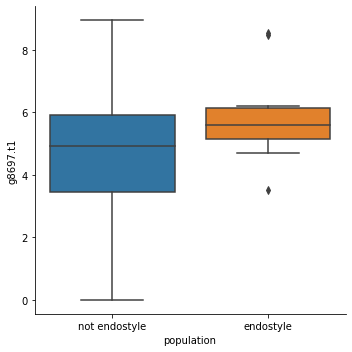

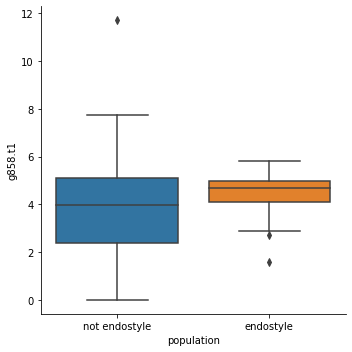

In [75]:
for g in gene_ids:
    print(f'\n--- {g} Endostyle vs not ---')
    sns.catplot(data=fullset, x="population", y=g, kind="box")

    print(
        ttest_ind(
            fullset.query('population == "endostyle"')[g],
            fullset.query('population != "endostyle"')[g],
            equal_var=False,
        )
    )

In [57]:
list(**)

TypeError: 'NoneType' object is not callable

In [ ]:

for group, values in fullset.groupby('population')[g]:

Ttest_indResult(statistic=2.306581692900161, pvalue=0.03422372954649556)